In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy, umath

93.7+/-0.9
89.0+/-0.9
0.000974+/-0.000009 -0.16+/-0.07


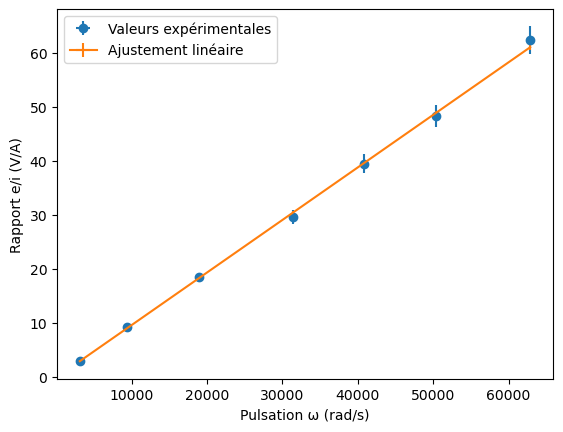

In [56]:
import ldd

df = pd.read_csv("1000spires.csv", sep=";")

nu = unumpy.uarray(df["nu"], 5)
omega = nu * (2 * np.pi)
e = unumpy.uarray(df["U2"], df["U2"] * 0.03)
u1 = unumpy.uarray(df["U1"], df["U1"] * 0.03)
delta_t = unumpy.uarray(df["delta_t"], df["delta_t"] * 0.01)
T = (1 / nu) * 10**6

dephasage = 360 * delta_t / T
i = u1 / 50
e_i = e / i



print(max(dephasage))
print(min(dephasage))

(a, b) = ldd.odr_fit(ldd.linear_function, omega, e_i, (1, 0))

print(a,b)


ldd.plot_error(omega, e_i, "Valeurs expérimentales", "o")
ldd.plot_error(omega, ldd.linear_function((a, b), omega), label="Ajustement linéaire")
plt.xlabel("Pulsation ω (rad/s)")
plt.ylabel("Rapport e/i (V/A)")
plt.legend()

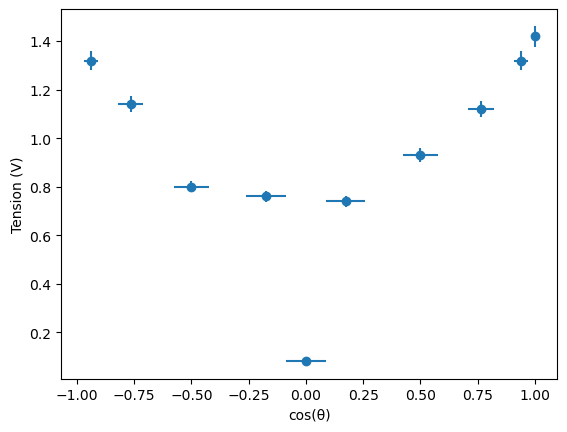

In [ ]:
df = pd.read_csv("angle.csv", sep=";")

theta = df["Angle"]
dtheta = 5
U2 = df["U2"]
dU2 = df["U2"] * 0.03

cosT = np.cos(np.deg2rad(theta))
dcosT = np.sin(np.deg2rad(theta)) * np.deg2rad(dtheta)

plt.errorbar(cosT, U2, dU2, dcosT, fmt="o")
plt.xlabel("cos(θ)")
plt.ylabel("Tension (V)")
plt.savefig("Graph_Angle.png")

In [54]:
amin = ufloat(2, 0.1) * 10**(-2)
amax1 = ufloat(3.6, 0.1) * 10**(-2)
amax2 = ufloat(3.55, 0.1) * 10**(-2)
d = ufloat(13, 0.1) * 10**(-2)
NH = 95
N1 = 1000
N2 = 500

val1 = (4/5)**(3/2) * 2 * 4 * np.pi * 10**(-7) * NH / d * (amin**2 + amax1**2 + amin*amax1) / 3 * N1
val2 = (4/5)**(3/2) * 2 * 4 * np.pi * 10**(-7) * NH / d * (amin**2 + amax2**2 + amin*amax2) / 3 * N2

print(val1 * 10**3)
print(val2 * 10**4)


1.06+/-0.05
5.19+/-0.26
